In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from skimage.feature import hog
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [2]:
from os import listdir
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import io, color, transform,data,exposure
from sklearn.metrics import confusion_matrix
from skimage.color import rgba2rgb
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import cv2

In [3]:
doc = "C:/Users/au_wa/Downloads/IS_CNN2"

In [4]:
listDir = listdir(doc)
print(listDir)
print(len(listDir))

['House', 'Other']
2


In [5]:
filehouse= doc+"/" +listDir[0]
fileOther= doc+"/"+listDir[1]
print(len(listdir(filehouse)))
print(len(listdir(fileOther)))

332
200


In [6]:
def getImage (Class, fileName):
  filesdoc= doc+'/'+Class+'/'+str(fileName)
  img = io.imread(filesdoc)
  img = transform.resize(img,(150,150))

  if img.shape == (150,150,4) :
     img=color.rgba2rgb(img)
    
  img=color.rgb2gray(img)
  
  return img


In [7]:
X = []
label = []
print(listDir[0])

House


In [8]:
for j in range(len(listDir)):
  fileDir = doc+"/"+listDir[j]
  listFile = listdir(fileDir)
  for i in range(len(listFile)):
    filename = listFile[i]
    img= getImage(listDir[j],filename)
    
    augimg=np.fliplr(img)
    
    augimg1 = transform.rotate(img,90)
    print(augimg1.dtype)
    augimg2 = transform.rotate(img,180)
    print(augimg1.dtype)
    augimg3 = transform.rotate(img,270)
    print(augimg1.dtype)
    
    img = hog(img, orientations = 5, pixels_per_cell= (5,5), cells_per_block= (2,2))
    augimg = hog(augimg, orientations = 5, pixels_per_cell= (5,5), cells_per_block= (2,2) )
    augimg1 = hog(augimg1, orientations = 5, pixels_per_cell= (5,5), cells_per_block= (2,2) )
    augimg2= hog(augimg2, orientations = 5, pixels_per_cell= (5,5), cells_per_block= (2,2) )
    augimg3 = hog(augimg3, orientations = 5, pixels_per_cell= (5,5), cells_per_block= (2,2) )
    
    X.append(img)
    X.append(augimg)
    X.append(augimg1)
    X.append(augimg2)
    X.append(augimg3)
    label.append(j) 
    label.append(j)
    label.append(j)
    label.append(j)
    label.append(j)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [9]:
houseAR= np.array(X)
labelAR=np.array(label)

In [10]:
print(len(houseAR))

print(houseAR[0].shape)


2660
(16820,)


In [11]:
train_img, test_img,train_label,test_label = train_test_split(houseAR, labelAR, test_size=0.20, random_state=1)


In [12]:
print(train_img.shape[1])

16820


In [13]:
G = 1/16820
gamma = 1 / (16820 * train_img.var())
print(G)
print(gamma)
print(train_img.var())

5.945303210463734e-05
0.003986223927252114
0.014914624263374242


In [14]:

model = SVC(C=1 ,kernel='rbf', gamma='scale')


In [15]:
model.fit(train_img,train_label)

SVC(C=1)

In [16]:
label_pred=model.predict(test_img)
print("Accuracy :", accuracy_score(y_pred = label_pred, y_true=test_label )*100)

Accuracy : 88.90977443609023


In [17]:
print(classification_report(y_true=test_label, y_pred = label_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       335
           1       0.90      0.79      0.84       197

    accuracy                           0.89       532
   macro avg       0.89      0.87      0.88       532
weighted avg       0.89      0.89      0.89       532



In [18]:
print(confusion_matrix(y_true=test_label, y_pred = label_pred))

[[318  17]
 [ 42 155]]


In [19]:
model5 = SVC(C=2 ,kernel='rbf', gamma=0.005)
model5.fit(train_img,train_label)


SVC(C=2, gamma=0.005)

In [20]:
label_pred5=model5.predict(test_img)
print("Accuracy :", accuracy_score(y_pred = label_pred5, y_true=test_label )*100)
print(classification_report(y_true=test_label, y_pred = label_pred5))

Accuracy : 89.66165413533834
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       335
           1       0.92      0.79      0.85       197

    accuracy                           0.90       532
   macro avg       0.90      0.87      0.89       532
weighted avg       0.90      0.90      0.89       532



In [21]:
model7 = SVC(C=2 ,kernel='rbf', gamma=0.001)
model7.fit(train_img,train_label)
label_pred7=model7.predict(test_img)
print("Accuracy :", accuracy_score(y_pred = label_pred7, y_true=test_label )*100)
print(classification_report(y_true=test_label, y_pred = label_pred7))

Accuracy : 87.59398496240601
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       335
           1       0.86      0.79      0.83       197

    accuracy                           0.88       532
   macro avg       0.87      0.86      0.86       532
weighted avg       0.88      0.88      0.87       532



In [22]:
model50 = SVC(C=2 ,kernel='rbf', gamma=0.003)
model50.fit(train_img,train_label)
label_pred50=model50.predict(test_img)
print("Accuracy :", accuracy_score(y_pred = label_pred50, y_true=test_label )*100)
print(classification_report(y_true=test_label, y_pred = label_pred50))

Accuracy : 90.0375939849624
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       335
           1       0.89      0.83      0.86       197

    accuracy                           0.90       532
   macro avg       0.90      0.89      0.89       532
weighted avg       0.90      0.90      0.90       532



In [23]:
model2 = SVC(C=2 ,kernel='rbf', gamma=0.00325)
model2.fit(train_img,train_label)
label_pred2=model2.predict(test_img)
print("Accuracy :", accuracy_score(y_pred = label_pred2, y_true=test_label )*100)
print(classification_report(y_true=test_label, y_pred = label_pred2))

Accuracy : 90.22556390977444
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       335
           1       0.90      0.83      0.86       197

    accuracy                           0.90       532
   macro avg       0.90      0.89      0.89       532
weighted avg       0.90      0.90      0.90       532



In [24]:
model2 = SVC(C=2 ,kernel='rbf', gamma=0.00329)
model2.fit(train_img,train_label)
label_pred2=model2.predict(test_img)
print("Accuracy :", accuracy_score(y_pred = label_pred2, y_true=test_label )*100)
print(classification_report(y_true=test_label, y_pred = label_pred2))

Accuracy : 90.22556390977444
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       335
           1       0.90      0.83      0.86       197

    accuracy                           0.90       532
   macro avg       0.90      0.89      0.89       532
weighted avg       0.90      0.90      0.90       532



In [28]:
image_test1 = io.imread('C:/Users/au_wa/OneDrive/Documents/Reserch IS/test/KP001+190.jpg')
imagecvtg1 = image_test1
image_test1TX=image_test1/255
print(imagecvtg1.shape)
print(image_test1.dtype)
print(image_test1)
print(image_test1TX.dtype)

(620, 750, 3)
uint8
[[[ 81 111  85]
  [ 54  84  56]
  [ 51  84  53]
  ...
  [ 63  86  60]
  [ 74  97  69]
  [ 76  99  71]]

 [[ 83 113  87]
  [ 55  85  57]
  [ 52  85  54]
  ...
  [ 58  78  53]
  [ 57  80  52]
  [ 71  94  66]]

 [[ 81 111  85]
  [ 53  83  55]
  [ 51  84  53]
  ...
  [ 49  68  46]
  [ 42  62  37]
  [ 70  90  65]]

 ...

 [[121 121 123]
  [163 163 165]
  [ 54  54  56]
  ...
  [122  95  65]
  [ 74  63  33]
  [ 66  70  37]]

 [[119 119 121]
  [213 213 215]
  [161 161 163]
  ...
  [182 140 115]
  [139 116  85]
  [ 84  78  44]]

 [[211 211 213]
  [228 228 230]
  [225 225 227]
  ...
  [247 203 178]
  [240 213 184]
  [218 203 172]]]
float64


float64


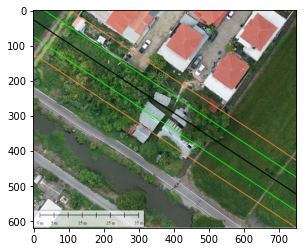

In [29]:
plt.imshow(image_test1TX)
print(image_test1TX.dtype)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[0.29195445 0.40960249 0.30567665]
  [0.20342155 0.32989115 0.21126435]
  [0.19607826 0.33137336 0.19901944]
  ...
  [0.21756529 0.29184261 0.20862622]
  [0.25408289 0.34321679 0.2396506 ]
  [0.29230493 0.38250089 0.27269767]]

 [[0.29516881 0.41281685 0.30889101]
  [0.20510772 0.33157732 0.21295052]
  [0.19749035 0.33278546 0.20043153]
  ...
  [0.21227485 0.28482262 0.20458852]
  [0.21165041 0.29090618 0.19416171]
  [0.25832269 0.34428273 0.23871508]]

 [[0.28662217 0.40427021 0.30034437]
  [0.20373581 0.33020541 0.21157862]
  [0.20529241 0.34058751 0.20823359]
  ...
  [0.20373528 0.27628181 0.20098966]
  [0.18060033 0.25550255 0.16805276]
  [0.27759309 0.35367139 0.26269139]]

 ...

 [[0.51810041 0.51810041 0.52123767]
  [0.5433825  0.5433825  0.54651976]
  [0.66858643 0.66858643 0.67172369]
  ...
  [0.5223557  0.40157415 0.24824252]
  [0.36196999 0.32294847 0.19059218]
  [0.27667804 0.30763641 0.17881328]]

 [[0.54339399 0.54339399 0.55123713]
  [0.55144167 0.55144167 0.55928481]


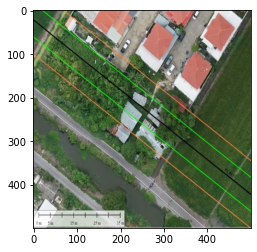

In [30]:
image_test1TXRe= transform.resize(image_test1TX,(500,500))
print(image_test1TXRe)
print(image_test1TXRe.dtype)
plt.imshow(image_test1TXRe)

float64
float64
[[0.40294275 0.2964949  0.29314667 ... 0.31073686 0.35330863 0.36115176]
 [0.41078588 0.30041647 0.29706824 ... 0.28214706 0.28664196 0.34154392]
 [0.40294275 0.29257333 0.29314667 ... 0.24461294 0.21940196 0.32920588]
 ...
 [0.47507529 0.63978118 0.2123302  ... 0.38656667 0.24774314 0.26184588]
 [0.46723216 0.83585961 0.63193804 ... 0.57695098 0.46530353 0.30126902]
 [0.82801647 0.89468314 0.88291843 ... 0.82567647 0.84959451 0.79981333]]


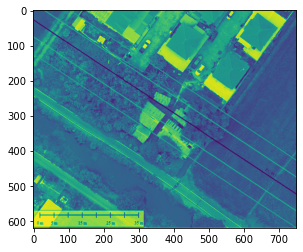

In [31]:
imagecvtg1=color.rgb2gray(imagecvtg1)
print(imagecvtg1.dtype)

imageTXcvtg1=color.rgb2gray(image_test1TX)
plt.imshow(imageTXcvtg1)
print(imageTXcvtg1.dtype)
print(imageTXcvtg1)

[[0.40294275 0.2964949  0.29314667 ... 0.31073686 0.35330863 0.36115176]
 [0.41078588 0.30041647 0.29706824 ... 0.28214706 0.28664196 0.34154392]
 [0.40294275 0.29257333 0.29314667 ... 0.24461294 0.21940196 0.32920588]
 ...
 [0.47507529 0.63978118 0.2123302  ... 0.38656667 0.24774314 0.26184588]
 [0.46723216 0.83585961 0.63193804 ... 0.57695098 0.46530353 0.30126902]
 [0.82801647 0.89468314 0.88291843 ... 0.82567647 0.84959451 0.79981333]]


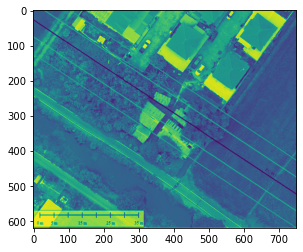

In [32]:
plt.imshow(imagecvtg1)
print(imagecvtg1)

In [33]:
img1 = np.asarray(imagecvtg1,dtype='float')
hogimg1,hogimg1vis = hog(img1, orientations = 5, pixels_per_cell= (5,5), cells_per_block= (2,2),visualize=True )



print(type(hogimg1))
print(hogimg1)

<class 'numpy.ndarray'>
[0.37144918 0.04105796 0.06830357 ... 0.4168868  0.4168868  0.12154817]


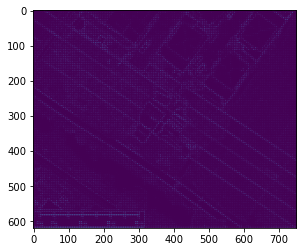

In [34]:
plt.imshow(hogimg1vis)

In [35]:
example_image1 = np.asarray(imagecvtg1)
image_test1=np.asarray(image_test1)


In [36]:
coords, features = slideExtract(example_image1)
detected = detect(image_test1)

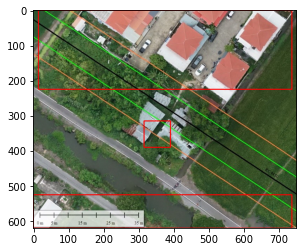

In [37]:
plt.imshow(detected)

In [38]:
image_test1_fea = io.imread('C:/Users/au_wa/Downloads/IS_CNN2/House/KP001+321-2.jpg')
image_test1_fea = transform.resize(image_test1_fea,(150,150))
image_test1_fea_g =color.rgb2gray(image_test1_fea)
image_test1_fea_g = np.asarray(image_test1_fea_g)

In [39]:
hog_image_test1_fea_g,hog_image_test1_fea_g_vis=  hog(image_test1_fea_g, orientations = 5, pixels_per_cell= (5,5), cells_per_block= (2,2),visualize=True )


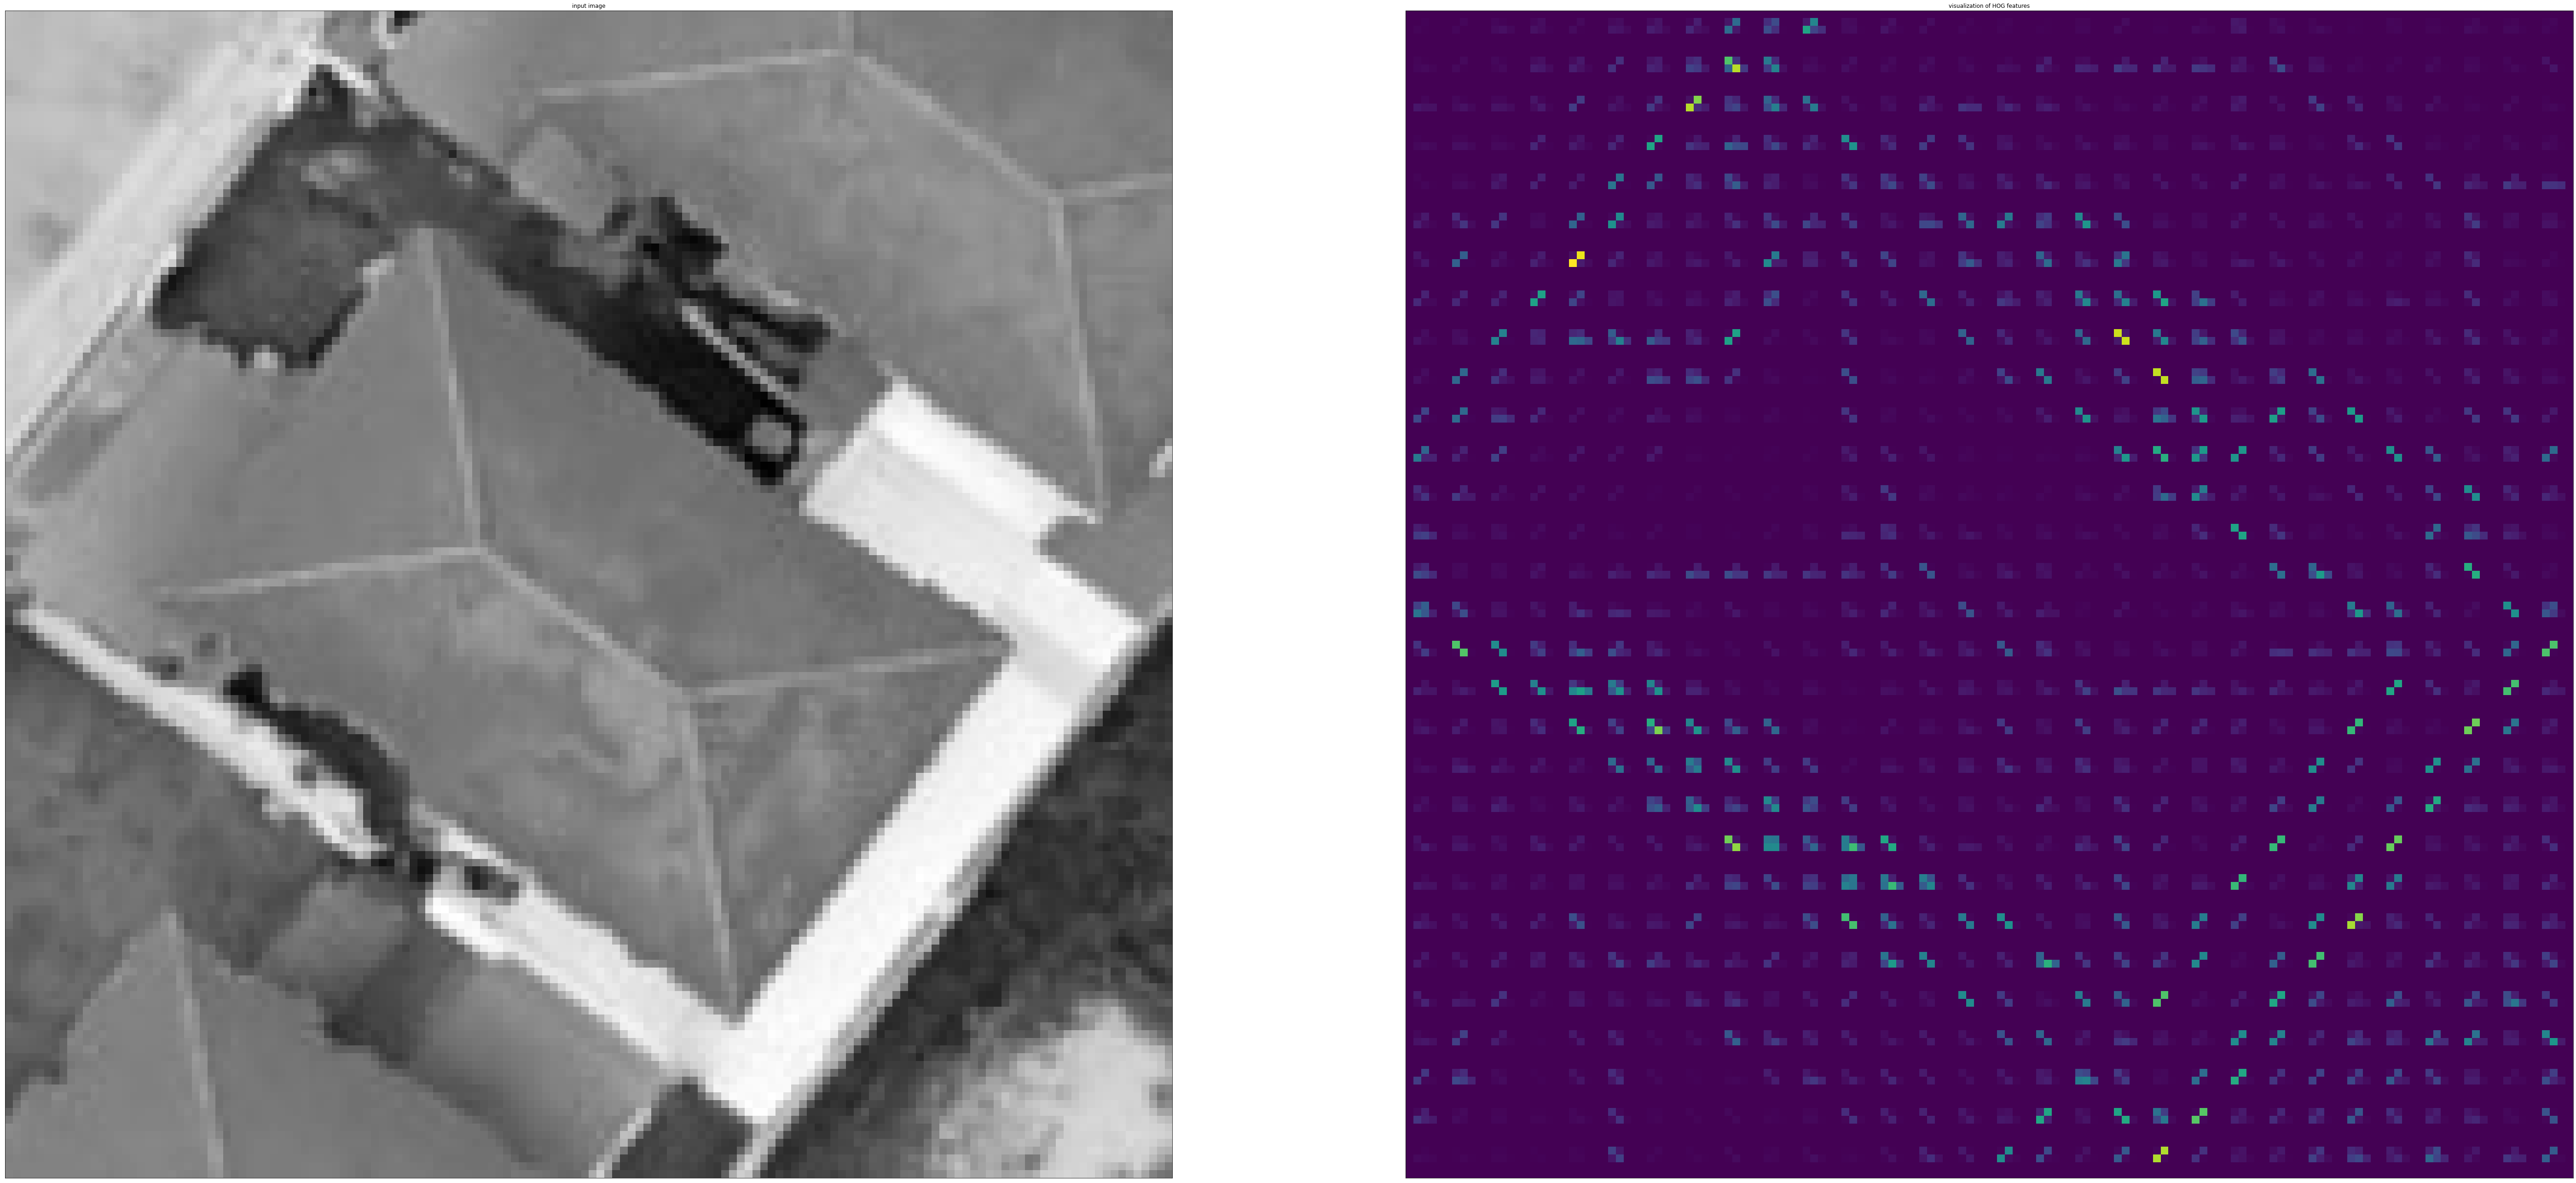

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(100, 100),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image_test1_fea_g, cmap='gray')
ax[0].set_title('input image')
ax[1].imshow(hog_image_test1_fea_g_vis)
ax[1].set_title('visualization of HOG features');

In [41]:
result = model.predict([features[1]])
print(result[0])

1


In [42]:
image_test2_fea = io.imread('C:/Users/au_wa/Downloads/IS_CNN2/House/KP001+321-2.jpg')
image_test2_fea = transform.resize(image_test2_fea,(150,150))
image_test2_fea_g =color.rgb2gray(image_test2_fea)
image_test2_fea_g = np.asarray(image_test2_fea_g)

In [43]:
hog_image_test2_fea_g,hog_image_test2_fea_g_vis=  hog(image_test2_fea_g, orientations = 5, pixels_per_cell= (10,10), cells_per_block= (4,4),visualize=True )

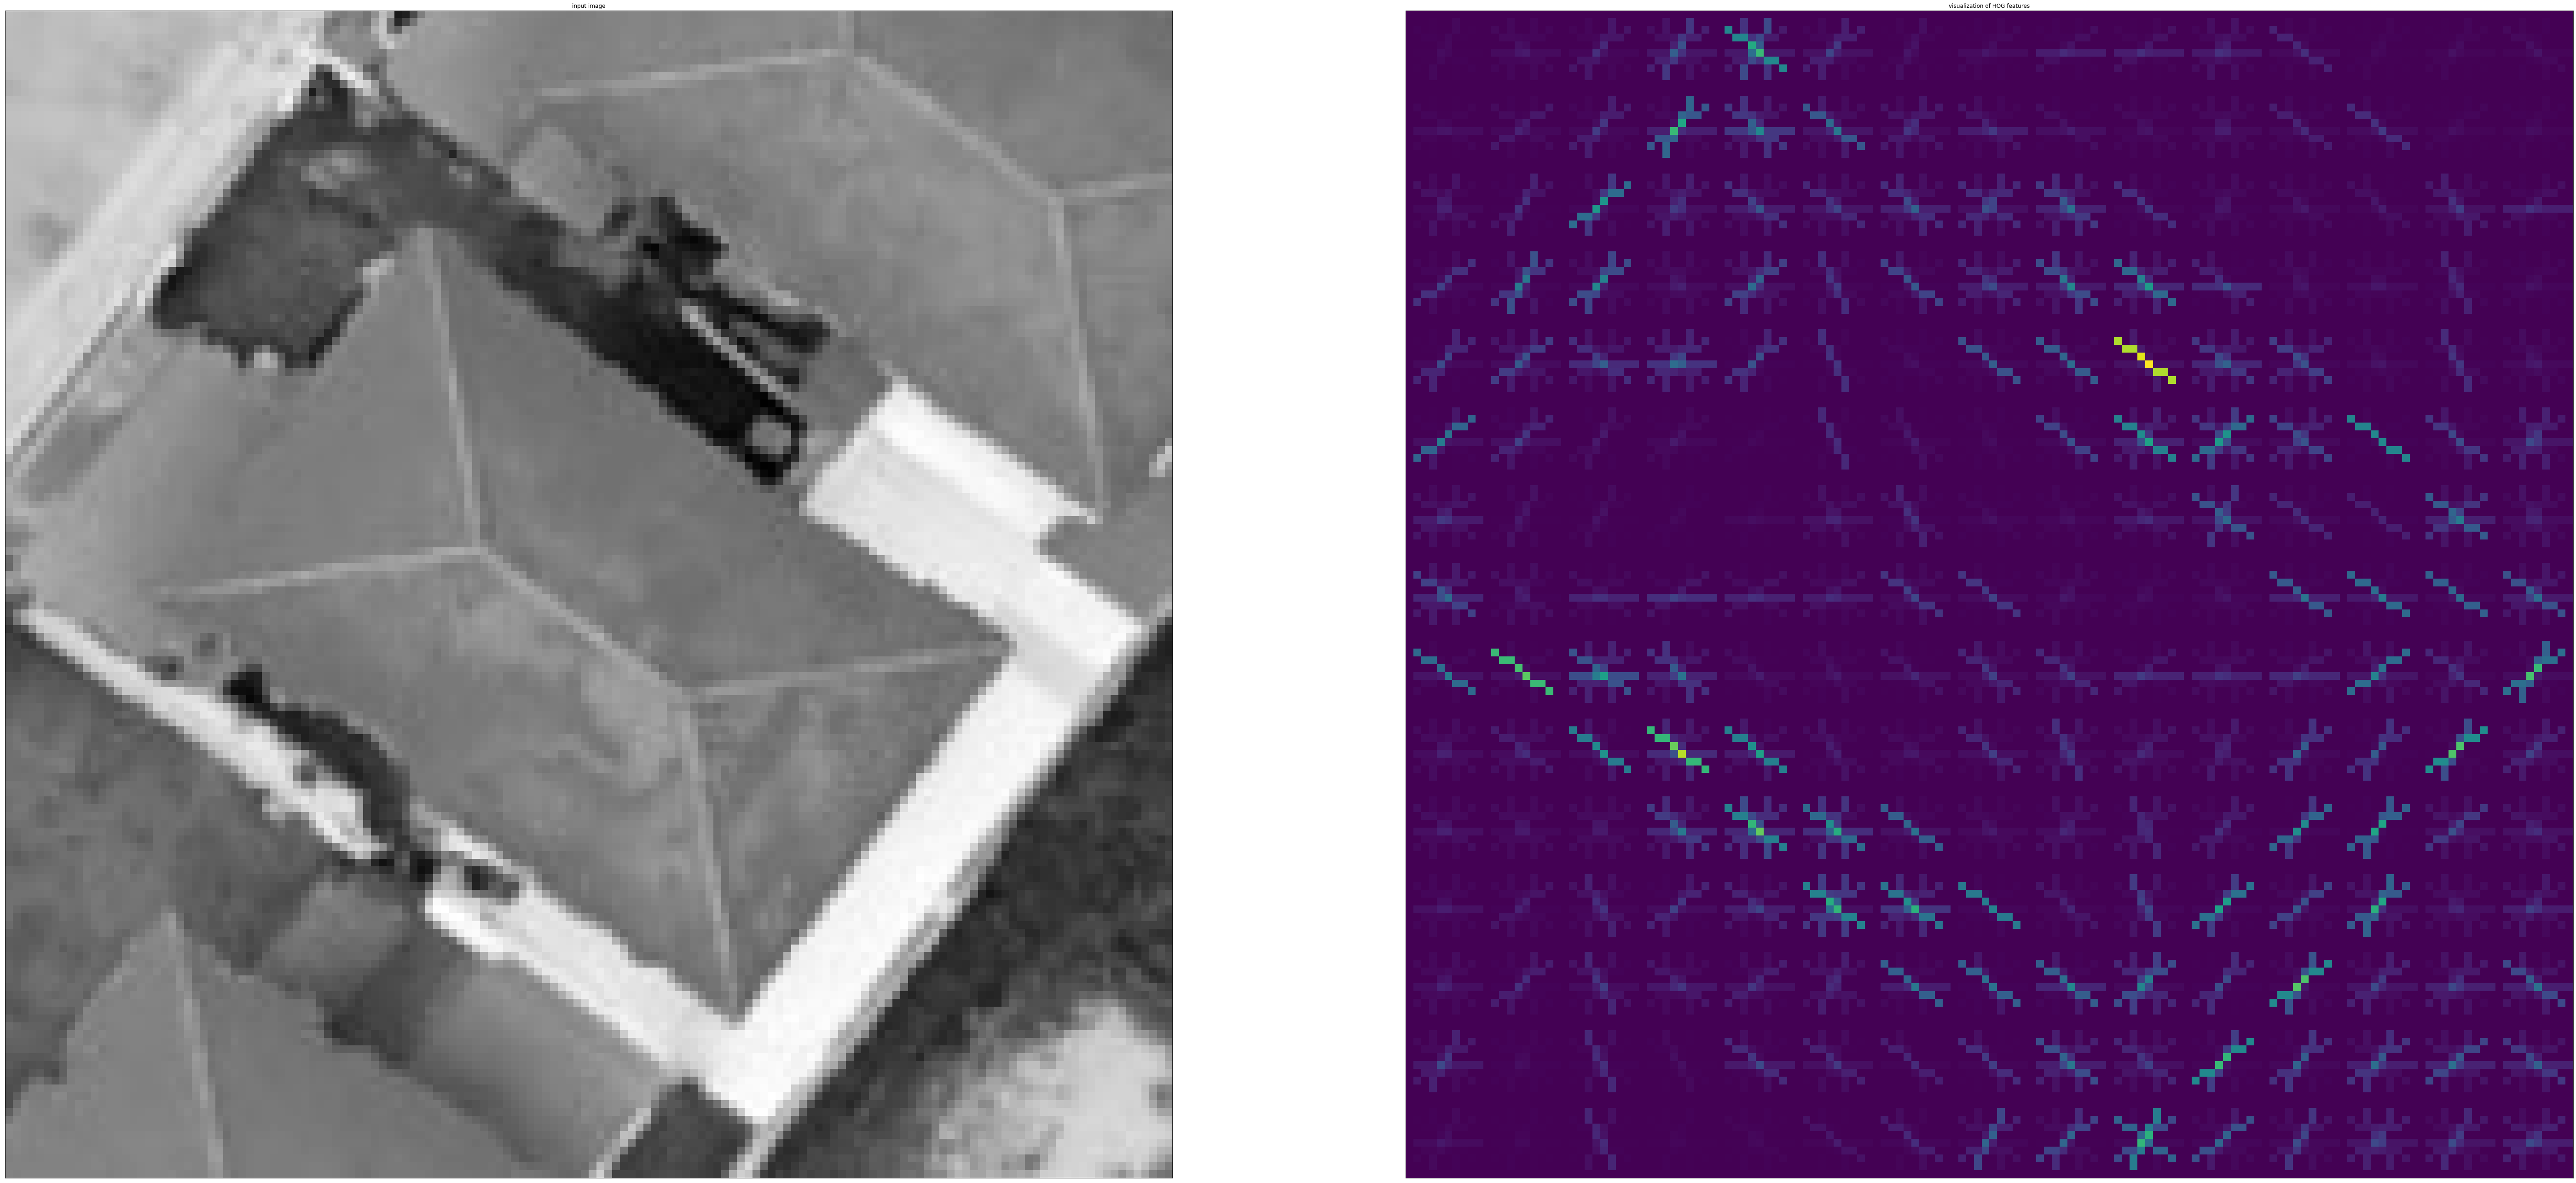

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(100, 100),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image_test2_fea_g, cmap='gray')
ax[0].set_title('input image')
ax[1].imshow(hog_image_test2_fea_g_vis)
ax[1].set_title('visualization of HOG features');

In [45]:
image_test2 = io.imread('C:/Users/au_wa/OneDrive/Documents/Reserch IS/test/KP8+260.jpg')
imagecvtg2 = image_test2
print(imagecvtg2.shape)

(612, 741, 3)


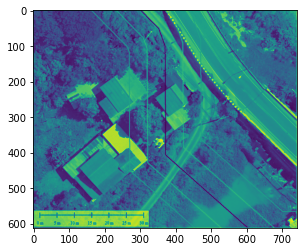

In [46]:
 imagecvtg2=color.rgb2gray(imagecvtg2)
plt.imshow(imagecvtg2)